In [43]:
import re
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

## Load Fuana Dataset

In [44]:
df = pd.read_csv('../data/fauna.csv.gz', compression='gzip')
df = df.set_index(keys=['page-id'])
df.head()

,class,family,genus,kingdom,order,phylum,species,text,title
page-id,,,,,,,,,
3451749,amphibia,ranidae,rana,animalia,anura,chordata,rboylii,The foothill yellow-legged frog (Rana boylii) ...,Foothill yellow-legged frog
38082824,amphibia,ranidae,lithobates,animalia,anura,chordata,lsylvaticus,This is a redirect from a title with another m...,Wood Frog
1369072,mammalia,bovidae,pantholopshodgson18342,animalia,artiodactyla,chordata,phodgsonii,The Tibetan antelope or chiru (Pantholops hodg...,Tibetan antelope
26625724,mammalia,bovidae,damaliscus,animalia,artiodactyla,chordata,dsuperstes,The Bangweulu tsessebe (Damaliscus superstes) ...,Bangweulu tsessebe
1709509,mammalia,tayassuidae,catagonusameghino1904,animalia,artiodactyla,chordata,cbrachydontuscmetropolitanuscstenocephaluscwag...,The Chacoan peccary or tagua (Catagonus wagner...,Chacoan peccary


## Visualize the number of records in each class

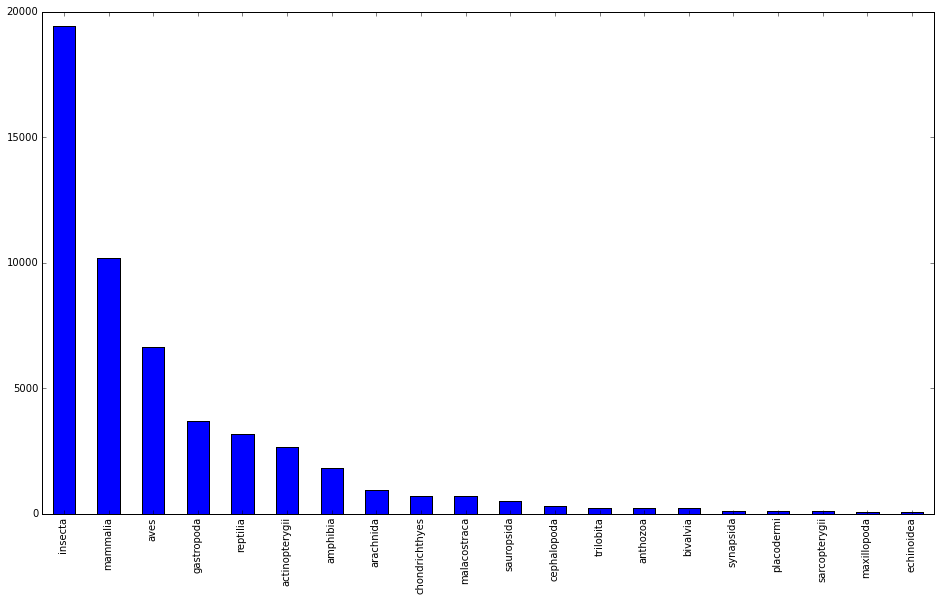

In [45]:
classes = df['class'].value_counts()
figure(figsize=(16, 9))
classes[0:20].plot(kind="bar")

### Create a TFIDF Table

In [188]:
from math import log

count = 0
limit = 10            # limit the number of documents we scan
doc_freq = {}           # doc_freq['word'].add(index)
term_freq = {}          # term_freq[234234] = {'word' : count}
word_count_history = [] # record the number of unique words in the corpus as we scan through it
for index, row in df[:limit].iterrows():
    if count < limit and row['text'] != '':
        count += 1
        if index in term_freq:
            terms = term_freq[index]
        else:
            terms = term_freq[index] = {}
        
        # find all words, ignore numbers, special characters and new lines/spaces/etc...
        s = str(row['text']).lower()
        word_list = re.findall(r'\b[^\W\d_]+\b', s)
        
        for word in word_list:
            if word in terms:
                terms[word] += 1
            else:
                terms[word] = 1
            
            if word in doc_freq:
                doc_freq[word].add(index)
            else:
                doc_freq[word] = set()
                doc_freq[word].add(index)
        word_count_history.append(len(doc_freq))

# convert the term frequencies to a DataFrame
tf = pd.DataFrame(term_freq)
tf = tf.fillna(0)
tf = tf.div(tf.sum(axis=1), axis=0)  # normalize term frequency against number of documents

# doc_freq is map of words to sets of doc ids, 
# we want to know how many documents each word is present in
# create a map of words to the actual number of documents the word is present in
doc_freq_counts = {}
for word in doc_freq:
    if word not in doc_freq_counts:
        doc_freq_counts[word] = len(doc_freq[word])
        
idf = pd.Series(doc_freq_counts)
idf = idf.apply(lambda x : log(len(doc_freq) / (x)))
tfidf = pd.DataFrame(tf.values.T * idf.values, index=tf.columns, columns=idf.index)

In [191]:
for index, row in tf.T.iterrows():
    for value in row:
        pass

doc_freq_test = tf.T

#doc_freq_test = tf.apply(lambda x : 1 if x > 0 else 0)
#doc_freq_test
#doc_freq_test.apply(lambda x : 1 if x > 0.0 else 0.0)
tf    
#print('The word abdomen shows up in {} documents'.format(len(doc_freq['abdomen'])))
#print(tf.shape)

#normed = tf.div(tf.sum(axis=1), axis=0)
#normed.T.head()
#df.div(df.sum(axis=1), axis=0)

#print(sum(tf[:1].values[0]))
#print(tf.head())
#print(tf.div(tf.sum(axis=1), axis=0).head())
#print(42 / 117)

,262734,1369072,1709509,3392087,3451749,3512831,18936840,26625724,38082824,39503931
a,0.358974,0.239316,0.145299,0.017094,0.128205,0.068376,0.008547,0.008547,0.025641,0.0
abdomens,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
abilities,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
ability,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
able,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
about,0.312500,0.187500,0.125000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.0
above,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0
absent,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
abundance,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
acacia,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [162]:
tfidf.head()

,a,abdomens,abilities,ability,able,about,above,absent,abundance,acacia,...,zoologist,zoos,zygodactyl,zygodactylous,zàng,β,གཙ,ད,藏羚羊,金刚口
262734,227.101214,0.000000,0.000000,0.000000,0.000000,31.090510,6.911249,0.000000,0.000000,0.000000,...,7.604396,0.000000,7.604396,7.604396,0.000000,7.604396,0.000000,0.000000,0.000000,0.0
1369072,151.400810,0.000000,0.000000,0.000000,6.911249,18.654306,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.604396,0.000000,7.604396,7.604396,7.604396,0.0
1709509,91.921920,0.000000,0.000000,0.000000,6.911249,12.436204,0.000000,0.000000,7.604396,7.604396,...,0.000000,7.604396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3392087,10.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3451749,81.107577,7.604396,7.604396,15.208793,0.000000,37.308612,6.911249,7.604396,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### Just for fun, how does the number of words increase as we count occurences?

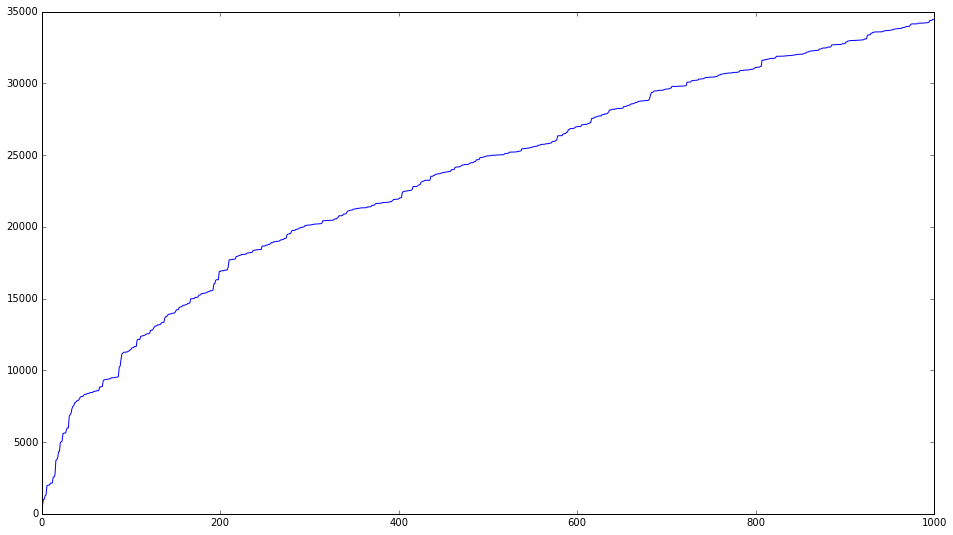

In [49]:
figure(figsize=(16, 9))
plot(word_count_history)